In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [4]:
len(xtrain)

60000

In [5]:
len(xtest)

10000

In [6]:
xtrain.shape

(60000, 28, 28)

In [9]:
xtrain = xtrain/255
xtest = xtest/255

In [10]:
xtrain_flat = xtrain.reshape(len(xtrain), 28*28)
xtrain_flat.shape

(60000, 784)

In [38]:
model = keras.Sequential([
  keras.layers.Dense(500, input_shape=(784,), activation='softplus'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(xtrain_flat, ytrain, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2848 - accuracy: 0.9134
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1221 - accuracy: 0.9625
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0806 - accuracy: 0.9752
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0553 - accuracy: 0.9819
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9863
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0328 - accuracy: 0.9892
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9934


In [39]:
xtest_flat = xtest.reshape(len(xtest), 28*28)
model.evaluate(xtest_flat, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9779


[0.08930703997612, 0.9779000282287598]

In [33]:
ypred = model.predict(xtest_flat)

313/313 [==============================] - 1s 2ms/step


In [34]:
ypred_labels = [np.argmax(ypred[i]) for i in range(len(ypred))]
ypred_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypred_labels)

Text(95.72222222222221, 0.5, 'Truth')

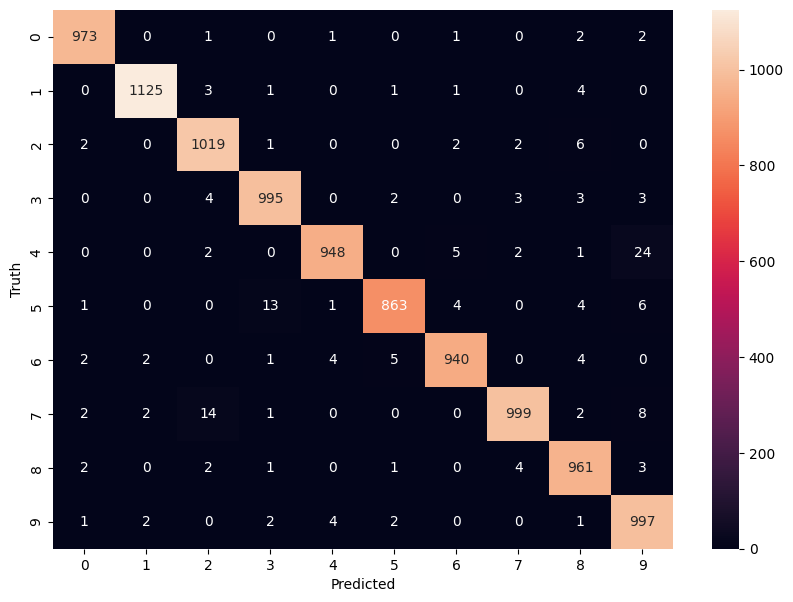

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')